# Данные

Сайт **http://www.selpravda.ru/** - газета Мокшанского района Пензенской области (полностью селский район, центр района - поселок). Более 7к текстов с датой, заголовками и разделом, к которому была отнесена статья

In [577]:
# drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# unzipping
import zipfile

path = "/content/drive/My Drive/gazeta.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("unzipped_files")
zip_ref.close()

In [0]:
import os

DIR = "/content/unzipped_files/gazeta"

files = os.listdir(DIR)

In [580]:
import re
texts = []
topics = []
for filename in files:
    with open(os.path.join(DIR, filename), "r", encoding='utf-8') as f:
        text = f.read()
        m = re.search('(.+)topic (.+)\n(.+)', text)
        if m:
            if m.group(3).strip():
                texts.append(m.group(3).strip())
                topics.append(m.group(2).strip())
        else:
            print(text)

@au Noname
@ti Социальная направленность
@da 09.03.2011
@topic Политика

@au Noname
@ti Дела и проблемы сельской администрации
@da 21.11.2012
@topic Власть и общество

@au Noname
@ti Внимание! Пропал ребенок!
@da 22.09.2016
@topic Власть и общество



In [0]:
import pandas as pd

df = pd.DataFrame({'text': texts, 'source': topics})

In [582]:
df.head()

,text,source
0,"С сентября в нашем детском саду ""Солнышко"" ста...",Образование
1,Выполняя Указ Президента Российской Федерации ...,Политика
2,Общий объем финансирования составит - 816 ты...,Социальная сфера
3,"При анализе уголовных, дел возбужденных в ОМВД...",Происшествия и Безопасность
4,"На вопрос, почему стихийные свалки возникают с...",Благоустройство и ЖКХ


In [583]:
df['source'].value_counts()

Социальная сфера               1650
Общество                       1063
Спорт                          1013
Образование                     717
Власть и общество               677
Сельское хозяйство района       462
Благоустройство и ЖКХ           428
Политика                        333
Происшествия и Безопасность     247
Регион-центр                    177
Здравоохранение                 115
Культура                         58
Экономика                        56
Человек и Закон                  13
Предпринимательство               3
Люди села                         2
Музей Журналистики                2
Name: source, dtype: int64

In [0]:
# merge-им "власть и общество" и "политику"
# texts = []
# topics = []
# for filename in files:
#     with open(os.path.join(DIR, filename), "r", encoding='utf-8') as f:
#         text = f.read()
#         m = re.search('(.+?)topic (.+?)\n(.+)', text)
#         if m:
#             if m.group(2).strip() == 'Власть и общество':
#                 topics.append('Политика')
#             else:
#                 topics.append(m.group(2).strip())
#             texts.append(m.group(3).strip())

# df = pd.DataFrame({'text': texts, 'source': topics})

# можно было сделать это же следующим образом:
df.source.replace(['Власть и общество'], ['Политика'], inplace=True)

In [585]:
df['source'].value_counts()

Социальная сфера               1650
Общество                       1063
Спорт                          1013
Политика                       1010
Образование                     717
Сельское хозяйство района       462
Благоустройство и ЖКХ           428
Происшествия и Безопасность     247
Регион-центр                    177
Здравоохранение                 115
Культура                         58
Экономика                        56
Человек и Закон                  13
Предпринимательство               3
Музей Журналистики                2
Люди села                         2
Name: source, dtype: int64

Возьмём первые четыре темы и из каждой темы возьмём по 1000 примеров случаным образом, чтобы получить равномерную выборку.

In [0]:
soc_sphere = df[df['source'] == 'Социальная сфера'].sample(n=1000)
society_sphere = df[df['source'] == 'Общество'].sample(n=1000)
sport_sphere = df[df['source'] == 'Спорт'].sample(n=1000)
politics_sphere = df[df['source'] == 'Политика'].sample(n=1000)

In [0]:
# Конкатенируем полученные датафреймы в один датафрейм
df = pd.concat([soc_sphere, society_sphere, sport_sphere, politics_sphere])

In [588]:
df.head()

,text,source
5071,Депутатами Собрания представителей внесены изм...,Социальная сфера
3101,"Торжественное мероприятие, посвященное 70-лети...",Социальная сфера
4855,В 2015 году 23 семьи улучшили свои жилищные ус...,Социальная сфера
1373,Этого человека знают все жители района старшег...,Социальная сфера
1954,По сравнению с предыдущим годом в Мокшанском р...,Социальная сфера


In [589]:
df.tail()

,text,source
4628,Участники семинара-совещания познакомились с р...,Политика
1621,На комиссии были рассмотрены вопросы профилакт...,Политика
1773,"За прошедшую неделю, согласно мониторингу цен ...",Политика
705,Началась пресс-конференция с минуты молчания в...,Политика
5887,В администрации Мокшанского района проведено с...,Политика


# Задача

Будем решать задачу тематической классификации. Формально задача заключается в следующем: по тексту ($d$) определить, какой он тематики, то есть, к какому классу $c$ ("Социальная сфера" / "Общество" / "Спорт" / "Политика") он принадлежит. 

## Описательные статистики
TODO:
* лемматизируем текст и удалим пунктуацию и стоп-слова из текстов (с помощью nltk)
* посчитаем количество слов (без лемматизации и с лемматизацией) в коллекции
* найдём среднюю длину текста в словах и символах
* найдём 10 самых частых существительных в текстах каждого паблика 

In [0]:
# удалим nan-значения, если таковые в датафрейме есть
df = df.dropna(how='any')
# сбросим индекс (после конкатенация строки занумерованы не по порядку)
df = df.reset_index(drop=True)

In [591]:
df.shape

(4000, 2)

In [592]:
# количество текстов
print("Количество текстов:", df.shape[0])

Количество текстов: 4000


In [593]:
# количество классов
print("Количество классов:", len(pd.unique(df[:]["source"])))

Количество классов: 4


In [594]:
# подключаем необходимые библиотеки

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
!pip install pymorphy2[fast]
import pymorphy2
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()
from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
noise = stopwords.words('russian') + list(punctuation)

In [0]:
# приводим к нижнему регистру и удаляем стоп-слова и знаки пунктуации
df['lowered_words'] = df['text'].apply(lambda text: [word.strip(punctuation) for word in word_tokenize(text.lower()) if word not in noise and word.strip(punctuation)])c

In [0]:
# сохраняем всю грамматическую информацию о словах в каждом тексте (берём самый вероятный вариант из предлагаемых pymorphy)
df['Parse'] = df['lowered_words'].apply(lambda words: [pymorphy2_analyzer.parse(word)[0] for word in words])

In [0]:
# берём лемму у каждого слова и получаем массив слов для каждого документа
df['lemmatized_words'] = df['Parse'].apply(lambda parse_words: [word.normal_form if word.normal_form else word.word for word in parse_words])

In [0]:
words = set()
for i in range(df.shape[0]):
    words.update(set(df.iloc[i]["lowered_words"]))

In [600]:
# количество слов без лемматизации в коллекции
print("Количество слов без лемматизации:", len(words))

Количество слов без лемматизации: 81716


In [0]:
lemmatized_words = set()
for i in range(df.shape[0]):
    lemmatized_words.update(set(df.iloc[i]["lemmatized_words"]))

In [602]:
# количество слов с лемматизацией в коллекции
print("Количество слов с лемматизацией:", len(lemmatized_words))

Количество слов с лемматизацией: 37955


Т.е. больше в среднем в корпусе по две (даже чуть больше) словоформы на каждую лексему.

In [0]:
df['symbols_length'] = df['text'].apply(lambda x: len(x))
df['words_length'] = df['lowered_words'].apply(lambda x: len(x))

In [604]:
# средние длины текстов в словах и символах
print("Средняя длина текста в символах:", df['symbols_length'].mean())

Средняя длина текста в символах: 1938.88325


In [605]:
print("Средняя длина текста в словах:", df['words_length'].mean())

Средняя длина текста в словах: 194.314


In [0]:
# сохраним также части речи слов документа в отдельном столбце
df['POS'] = df['Parse'].apply(lambda parse_words: [parse_word.tag.POS for parse_word in parse_words])

In [607]:
df.head()

,text,source,lowered_words,Parse,lemmatized_words,symbols_length,words_length,POS
0,Депутатами Собрания представителей внесены изм...,Социальная сфера,"[депутатами, собрания, представителей, внесены...","[(депутатами, NOUN,anim,masc plur,ablt, депута...","[депутат, собрание, представитель, внести, изм...",694,74,"[NOUN, NOUN, NOUN, PRTS, NOUN, NOUN, ADJF, NOU..."
1,"Торжественное мероприятие, посвященное 70-лети...",Социальная сфера,"[торжественное, мероприятие, посвященное, 70-л...","[(торжественное, ADJF,Qual neut,sing,nomn, тор...","[торжественный, мероприятие, посвятить, 70-лет...",953,98,"[ADJF, NOUN, PRTF, NOUN, NOUN, ADJF, ADJF, NOU..."
2,В 2015 году 23 семьи улучшили свои жилищные ус...,Социальная сфера,"[2015, году, 23, семьи, улучшили, свои, жилищн...","[(2015, NUMB,intg, 2015, 1.0, ((<NumberAnalyze...","[2015, год, 23, семья, улучшить, свой, жилищны...",470,53,"[None, NOUN, None, NOUN, VERB, ADJF, ADJF, NOU..."
3,Этого человека знают все жители района старшег...,Социальная сфера,"[человека, знают, жители, района, старшего, по...","[(человека, NOUN,anim,masc sing,gent, человек,...","[человек, знать, житель, район, старший, покол...",1989,199,"[NOUN, VERB, NOUN, NOUN, NOUN, NOUN, None, NOU..."
4,По сравнению с предыдущим годом в Мокшанском р...,Социальная сфера,"[сравнению, предыдущим, годом, мокшанском, рай...","[(сравнению, NOUN,inan,neut sing,datv, сравнен...","[сравнение, предыдущий, год, мокшанский, район...",621,64,"[NOUN, ADJF, NOUN, ADJF, NOUN, NOUN, ADJF, NOU..."


In [608]:
# найдём 10 самых частых существительных в текстах каждого паблика
from collections import Counter

dct = dict()
for public in pd.unique(df[:]["source"]):
    words = []
    for text, poses in zip(df[df['source'] == public]['lemmatized_words'], df[df['source'] == public]['POS']):
        words.extend([word for i, word in enumerate(text) if poses[i] == 'NOUN'])
    print('topic:', public)
    print(*Counter(words).most_common(10))
    dct[public] = {pair[0] for pair in Counter(words).most_common(10)}

topic: Социальная сфера
('год', 2053) ('ребёнок', 1451) ('район', 1157) ('человек', 991) ('работа', 839) ('семья', 805) ('день', 611) ('дом', 608) ('жизнь', 607) ('время', 578)
topic: Общество
('год', 2267) ('район', 1669) ('человек', 1066) ('ребёнок', 1035) ('гражданин', 981) ('средство', 930) ('работа', 767) ('рф', 734) ('движение', 726) ('время', 714)
topic: Спорт
('команда', 1785) ('год', 1741) ('место', 1551) ('соревнование', 1399) ('район', 1395) ('школа', 925) ('спорт', 862) ('область', 811) ('участие', 699) ('ребёнок', 680)
topic: Политика
('год', 2402) ('район', 2113) ('область', 1894) ('вопрос', 1519) ('работа', 1403) ('рубль', 1163) ('администрация', 1112) ('глава', 948) ('человек', 916) ('развитие', 893)


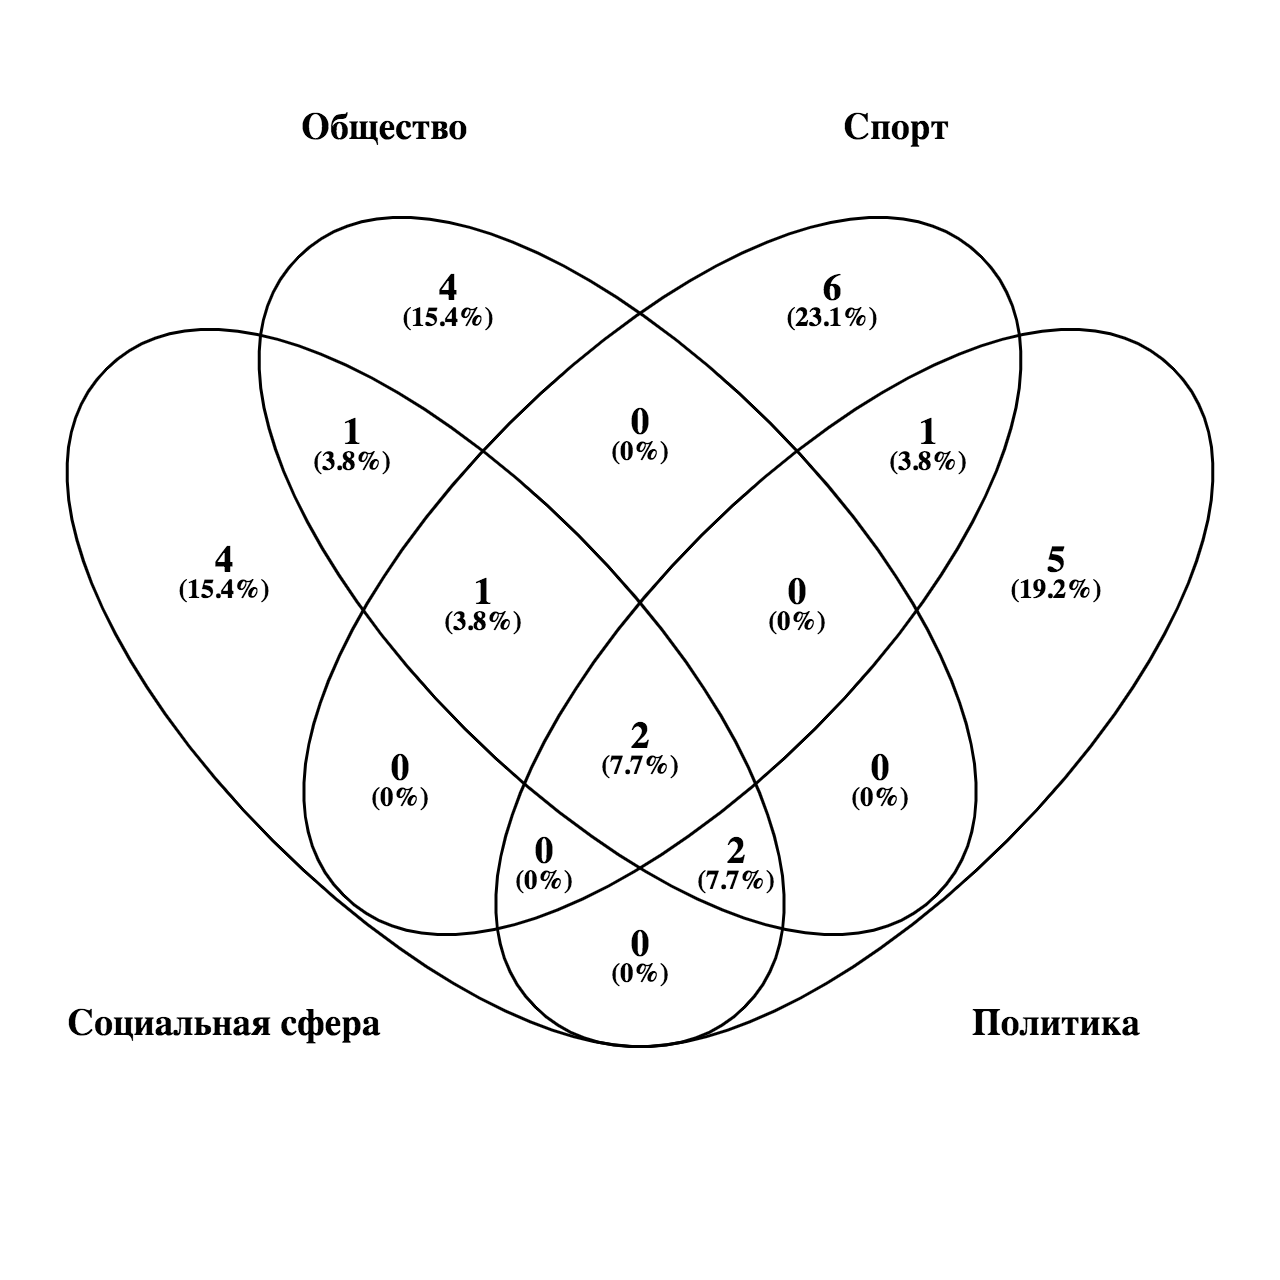

In [609]:
from IPython.display import Image
Image('/content/drive/My Drive/vienn_diagram.png', width=600, height=600)

In [610]:
# общие слова для всех топиков
common = dct['Социальная сфера'] & dct['Общество'] & dct['Спорт'] & dct['Политика']
print(common)

{'год', 'район'}


In [611]:
# общие слова для социальной сферы, общества и спорта
dct['Социальная сфера'] & dct['Общество'] & dct['Спорт'] - common

{'ребёнок'}

In [612]:
# общие слова для социальной сферы, общества и политики
dct['Социальная сфера'] & dct['Общество'] & dct['Политика'] - common

{'работа', 'человек'}

In [613]:
# общие слова для социальной сферы, политики и спорта
dct['Социальная сфера'] & dct['Политика'] & dct['Спорт'] - common

set()

In [614]:
# общие слова для общества, политики и спорта
dct['Общество'] & dct['Политика'] & dct['Спорт'] - common

set()

In [615]:
print(dct['Политика'] & dct['Спорт'] - common,
      dct['Политика'] & dct['Общество'] - common,
      dct['Политика'] & dct['Социальная сфера'] - common,
      dct['Спорт'] & dct['Общество'] - common,
      dct['Спорт'] & dct['Социальная сфера'] - common,
      dct['Социальная сфера'] & dct['Общество'] - common,
      sep = '\n')

{'область'}
{'работа', 'человек'}
{'работа', 'человек'}
{'ребёнок'}
{'ребёнок'}
{'время', 'работа', 'человек', 'ребёнок'}


In [0]:
# if we want to delete some columns
# df = df.drop(['symbols_length', 'words_length', 'lowered_words', 'Parse', 'lemmatized_words', 'POS'], axis=1)

Добавим также лемматизированный текст (т.е. с-join-им поле lemmatized_words).

In [0]:
df['lemmatized_text'] = df['lemmatized_words'].apply(lambda x: ' '.join(x))

Разделите коллекцию текстов на обучающую и тестовую части в соотношение 80% на 20%. 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train_full, X_test_full, y_train, y_test = train_test_split(df.loc[:, df.columns != 'source'], df['source'], test_size=0.2, random_state=21)

In [620]:
X_train_full.shape, X_test_full.shape, y_train.shape, y_test.shape

((3200, 8), (800, 8), (3200,), (800,))

In [621]:
# темы распределены равномерно
print(y_train.value_counts())

Политика            811
Спорт               803
Общество            797
Социальная сфера    789
Name: source, dtype: int64


## Классификация по правилам

Оценим с помощью классификации по правилам минимальный baseline, который должны превосходить более сложные модели (например, нейросети)
 
 * Разработаем несколько правил вида "Если встречается слово $w$, то текст имеет тему $c$". Для этого определим, какие слова среди топ-10 уникальны для темы.
 * Посчитаем метрики для классификации по правилам (точность, полноту, $f$-меру и $accuracy$)
 * Убедимся в том, что наши правила ошибаются.

In [622]:
dct['Социальная сфера'] - (dct['Политика'] | dct['Спорт'] | dct['Общество'])

{'день', 'дом', 'жизнь', 'семья'}

In [623]:
dct['Политика'] - (dct['Социальная сфера'] | dct['Спорт'] | dct['Общество'])

{'администрация', 'вопрос', 'глава', 'развитие', 'рубль'}

In [624]:
dct['Спорт'] - (dct['Социальная сфера'] | dct['Политика'] | dct['Общество'])

{'команда', 'место', 'соревнование', 'спорт', 'участие', 'школа'}

In [625]:
dct['Общество'] - (dct['Социальная сфера'] | dct['Политика'] | dct['Спорт'])

{'гражданин', 'движение', 'рф', 'средство'}

In [0]:
import random

# задаём правила
def rules(text):
    if text & {'дом', 'семья', 'жизнь', 'день'}:
        return 'Социальная сфера'
    elif text & {'администрация', 'глава', 'развитие', 'вопрос', 'рубль'}:
        return 'Политика'
    elif text & {'команда', 'соревнование', 'спорт', 'школа', 'участие', 'место'}:
        return 'Спорт'
    elif text & {'гражданин', 'рф', 'движение', 'средство'}:
        return 'Общество'
    else: # случайный выбор
        return random.choice(['Социальная сфера', 'Политика', 'Спорт', 'Общество'])

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

labels=['Социальная сфера', 'Политика', 'Спорт', 'Общество']

# определяем функции для визуализации работы алгоритма и подсчёта метрик
def get_cm(X, y):
    predictions = []
    for index, row in X.iterrows():
        predictions.append(rules(set(row['lowered_words'])))
    cm = confusion_matrix(y, predictions, labels)
    return cm

def plot_cm(cm):
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True);

def print_metrics_from_cm(cm):
    precisions = np.diag(cm) / np.sum(cm, axis=0)
    recalls = np.diag(cm) / np.sum(cm, axis=1)
    mean_precision = np.mean(precisions)
    print("Mean Precision:", mean_precision)
    mean_recall = np.mean(recalls)
    print("Mean Recall", mean_recall)
    print("Accuracy:", np.sum(np.diag(cm)) / np.sum(cm))
    print("F1 score:", 2 * mean_precision * mean_recall / (mean_precision + mean_recall))

Mean Precision: 0.45136540660367985
Mean Recall 0.4322754861424537
Accuracy: 0.4321875
F1 score: 0.44161423983248704


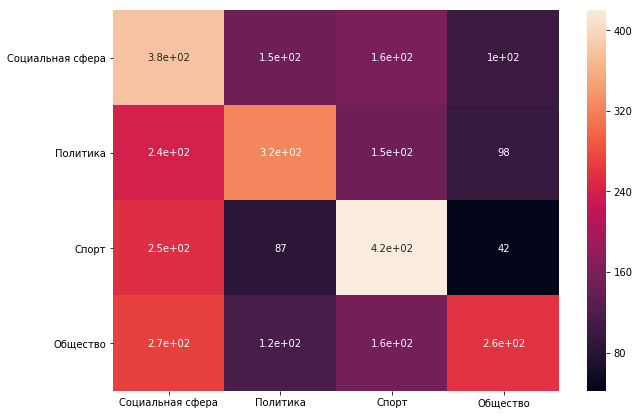

In [628]:
# На обучающей выборке

cm = get_cm(X_train_full, y_train)
plot_cm(cm)
print_metrics_from_cm(cm)

Mean Precision: 0.44635202489591275
Mean Recall 0.43712485827127495
Accuracy: 0.4375
F1 score: 0.44169025661942496


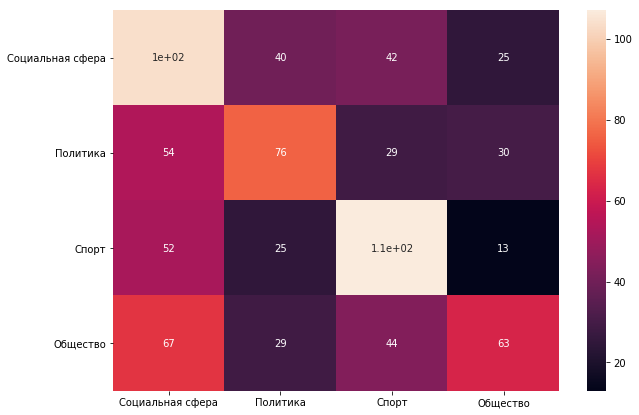

In [629]:
# На тестовой выборке

cm = get_cm(X_test_full, y_test)
plot_cm(cm)
print_metrics_from_cm(cm)

Mean Precision: 0.4511672681262149
Mean Recall 0.434
Accuracy: 0.434
F1 score: 0.44241715982398355


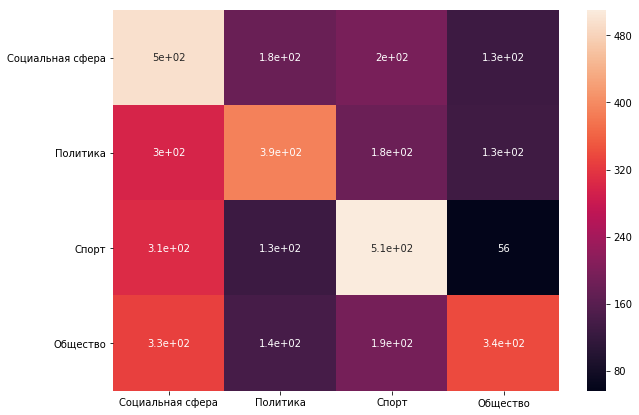

In [630]:
# На всей выборке

X = df.loc[:, df.columns != 'source']
y = df['source']

cm = get_cm(X, y)
plot_cm(cm)
print_metrics_from_cm(cm)

Т.е. качество довольно плохое, несмотря на то, что определённую долю (~ 25%) правильных ответов привносит случайный выбор, потому что мы используем не самые изощрённые правила.

Проверим, есть ли среди наших правил те, которые никогда не ошибаются.

In [631]:
fl_soc_is_not_ideal = 0
fl_politics_is_not_ideal = 0
fl_sport_is_not_ideal = 0
fl_society_is_not_ideal = 0

for index, row in X.iterrows():
    # labels=['Социальная сфера', 'Политика', 'Спорт', 'Общество']
    if y[index] == 'Социальная сфера' and not fl_soc_is_not_ideal:
        if not (set(row['lowered_words']) & {'дом', 'семья', 'жизнь', 'день'}):
            fl_soc_is_not_ideal = 1
            print('rule for social sphere is not ideal')
    elif y[index] == 'Политика' and not fl_politics_is_not_ideal:
        if not (set(row['lowered_words']) & {'администрация', 'глава', 'развитие', 'вопрос', 'рубль'}):
            fl_politics_is_not_ideal = 1
            print('rule for politics is not ideal')
    elif y[index] == 'Спорт' and not fl_sport_is_not_ideal:
        if not (set(row['lowered_words']) & {'почта', 'отделение', 'письмо'}):
            fl_sport_is_not_ideal = 1
            print('rule for sport is not ideal')
    elif not fl_society_is_not_ideal: # y[index] == 'Общество'
        if not (set(row['lowered_words']) & {'полиция', 'мвд', 'москва'}):
            fl_society_is_not_ideal = 1
            print('rule for society is not ideal')

rule for social sphere is not ideal
rule for society is not ideal
rule for sport is not ideal
rule for politics is not ideal


Естественно, ни одно из правил не является идеальным. Можно взять уникальное слово (встречающееся только один раз в данном корпусе или несколько раз, но только в одном корпусе) и создать правило типа "если встретилось это слово, то это категория c (категория, в которой встретилось это слово)", но и оно получено "переобучением" (т.е. мы знали ответы заранее), т.е. не будет универсальным для новых тестовых данных.

Для никогда не ошибающихся правил (но только для данного датасета) можно взять, к примеру, следующие слова:

In [0]:
words = []
for i in range(df.shape[0]):
    words.extend(df.iloc[i]["lowered_words"])

In [633]:
[(key, value) for key, value in Counter(words).items() if value == 1][:15]

[('этики', 1),
 ('списание', 1),
 ('триумфа', 1),
 ('ратной', 1),
 ('10400', 1),
 ('фотокорреспондентом', 1),
 ('бригадиры', 1),
 ('скотники', 1),
 ('пастухи', 1),
 ('удочка', 1),
 ('признаю', 1),
 ('заводит', 1),
 ('иж', 1),
 ('исколесил', 1),
 ('поклевку', 1)]

## Baseline с Pipeline-ом
Используем стандартный ```sklearn.pipeline``` для классификации текстов, который состоит из:
* векторизации (с помощью CountVectorizer)
* $tf-idf$ взвешивания (с помощью TfidfTransformer)
* метода классификации (MultinomialNB и SGDClassifier)

Далее оценим результаты классификации по метрикам, визуализируем ошибки (с помощью confusion matrix) и проведите их анализ.

In [0]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

Мультиномиальный наивный Байес даёт хороший baseline, поэтому будем использовать именно этот классификатор. В качестве векторайзера используем BOW (частотности) с tf-idf взвешиванием.

In [0]:
pipeline = Pipeline([('vectorizer', CountVectorizer()), ('tf_idf', TfidfTransformer()), ('classifier', MultinomialNB())], verbose=True)

In [0]:
X_train = X_train_full['text']
X_test = X_test_full['text']

In [637]:
pipeline.fit(X_train, y_train)

[Pipeline] ........ (step 1 of 3) Processing vectorizer, total=   0.7s
[Pipeline] ............ (step 2 of 3) Processing tf_idf, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tf_idf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=True)

In [0]:
predictions = pipeline.predict(X_test)

In [0]:
cm = confusion_matrix(y_test, predictions, labels)

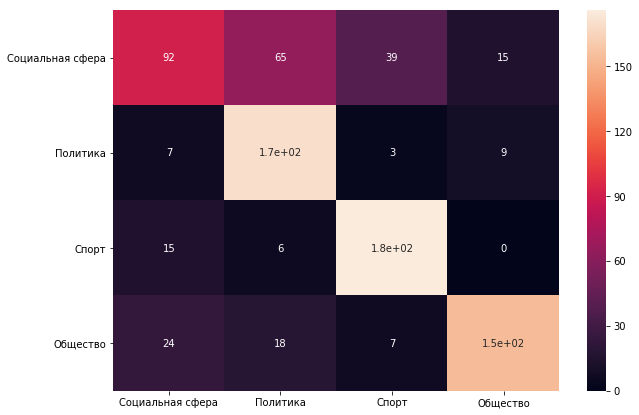

In [640]:
plot_cm(cm)

In [641]:
print_metrics_from_cm(cm)

Mean Precision: 0.742607021146347
Mean Recall 0.7468778904251174
Accuracy: 0.74
F1 score: 0.7447363327547922


In [642]:
print(classification_report(y_test, predictions, labels))

                  precision    recall  f1-score   support

Социальная сфера       0.67      0.44      0.53       211
        Политика       0.66      0.90      0.76       189
           Спорт       0.78      0.89      0.83       197
        Общество       0.87      0.76      0.81       203

        accuracy                           0.74       800
       macro avg       0.74      0.75      0.73       800
    weighted avg       0.74      0.74      0.73       800



Качество немного значительно.

Как видно из матрицы ошибок чаще всего (69) классификатор ошибочно приписывает лейбл "Социальная сфера" к текстам, в действительности имеющим лейбл "Политика" , но не наоборот. Следующей по частотности ошибкой (21) является приписывание лейбла "Социальная сфера" к текстам, имеющим лейбл "Общество" и наоборот (19). Общество и политика такэе часто путаются. Вероятно, так происходит из-за плохой семантической разграниченности этих тем. Также часто путаются "Спорт" и "Социальная сфера".

Попробуем также считающийся лучшим линейный классификатор с обучением с помощью стохастического градиентного спуска (SGD классификатор на дефолтных параметрах).

In [0]:
pipeline = Pipeline([('vectorizer', CountVectorizer()), ('tf_idf', TfidfTransformer()), ('classifier', SGDClassifier())], verbose=True)

In [644]:
pipeline.fit(X_train, y_train)

[Pipeline] ........ (step 1 of 3) Processing vectorizer, total=   0.7s
[Pipeline] ............ (step 2 of 3) Processing tf_idf, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabula...
                ('classifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
              

In [0]:
predictions = pipeline.predict(X_test)

In [0]:
cm = confusion_matrix(y_test, predictions, labels)

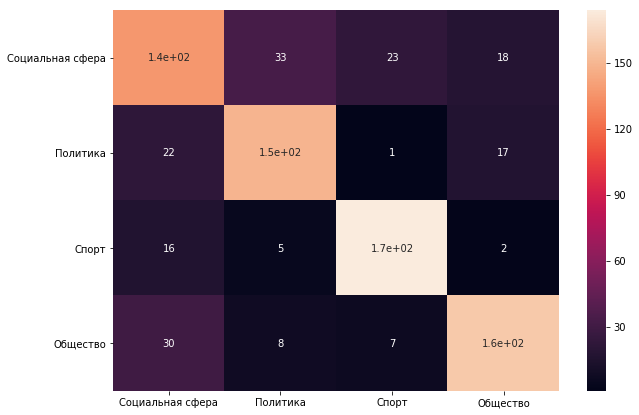

In [647]:
plot_cm(cm)

In [648]:
print_metrics_from_cm(cm)

Mean Precision: 0.7728580362726705
Mean Recall 0.7748056855007578
Accuracy: 0.7725
F1 score: 0.7738306353822773


In [649]:
print(classification_report(y_test, predictions, labels))

                  precision    recall  f1-score   support

Социальная сфера       0.67      0.65      0.66       211
        Политика       0.76      0.79      0.78       189
           Спорт       0.85      0.88      0.87       197
        Общество       0.81      0.78      0.79       203

        accuracy                           0.77       800
       macro avg       0.77      0.77      0.77       800
    weighted avg       0.77      0.77      0.77       800



Качество стало на пару процентов лучше, чем у MultinomialNB.

Аналогично MultinomialNB SGDClassifier также путает "Социальную сферу" с "Политикой" (35 и 13), "Общество" с "Социальной сферой" и "Спорт" с "Социальной сферой". Вероятно, "Социальная сфера" отчасти включает в себя все эти темы ("Политика", "Общество", "Спорт").

## Pipeline со снижением размерности
Добавим в наш ```sklearn.pipeline```  метод снижения размерности: LSA (латентно-семантический анализ). После методов снижения размерности разумно использовать классификаторы, которые ожидают получить Dense, а не Sparse матрицу на вход.

In [0]:
# Используем LSA (латентно-семантический анализ): применяем TruncatedSVD после tf-idf трансформатора.
from sklearn.decomposition import TruncatedSVD

In [651]:
pipeline = Pipeline(steps=[('vectorizer', CountVectorizer()), ('tf_idf', TfidfTransformer()), ('lsa', TruncatedSVD()), ('classifier', SGDClassifier())], verbose=True)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

[Pipeline] ........ (step 1 of 4) Processing vectorizer, total=   0.7s
[Pipeline] ............ (step 2 of 4) Processing tf_idf, total=   0.1s
[Pipeline] ............... (step 3 of 4) Processing lsa, total=   0.2s
[Pipeline] ........ (step 4 of 4) Processing classifier, total=   0.0s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Mean Precision: nan
Mean Recall 0.5040147922171377
Accuracy: 0.5
F1 score: nan


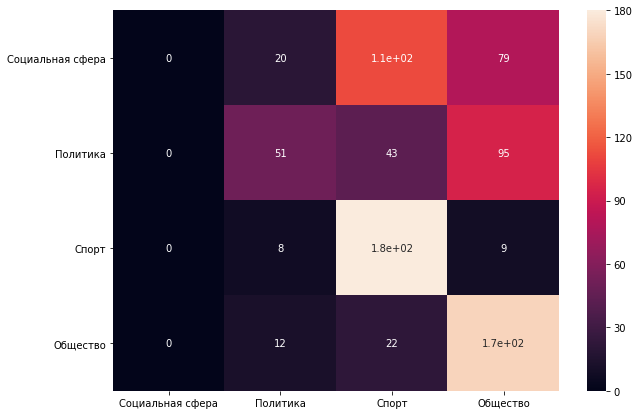

In [652]:
cm = confusion_matrix(y_test, predictions, labels)
plot_cm(cm)
print_metrics_from_cm(cm)

После tf-idf у нас есть sparce матрица, после понижения размерности с помощью, например, LSA, получаем dense матрицу.

SGD классификатор (как и, например, LinearSVC классификатор) явно не подходит для использования после LSA, поскольку он ожидает именно sparce матрицу (это видно и по сильно упавшему (на 30%) качеству выше), а мы сознательно уменьшаем её размерность. MultinomialNB в принципе выдаёт ошибку из-за несовместимости.

Поэтому разумно использовать классификаторы, которые ожидают на вход именно dense матрицу. Среди таковых, например, случайный лес (RandomForestClassifier()), 

In [0]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[('vectorizer', CountVectorizer()), ('tf_idf', TfidfTransformer()), ('lsa', TruncatedSVD()), ('classifier', RandomForestClassifier())], verbose=True)

In [654]:
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

[Pipeline] ........ (step 1 of 4) Processing vectorizer, total=   0.7s
[Pipeline] ............ (step 2 of 4) Processing tf_idf, total=   0.1s
[Pipeline] ............... (step 3 of 4) Processing lsa, total=   0.2s
[Pipeline] ........ (step 4 of 4) Processing classifier, total=   0.1s


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Precision: 0.5645070912450592
Mean Recall 0.5565779803966512
Accuracy: 0.55375
F1 score: 0.5605144956656356


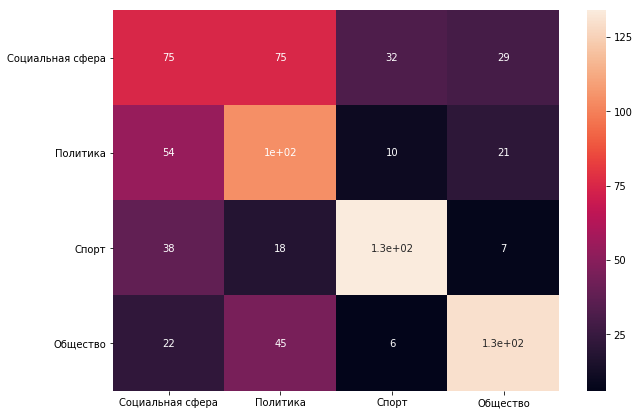

In [655]:
cm = confusion_matrix(y_test, predictions, labels)
plot_cm(cm)
print_metrics_from_cm(cm)

In [0]:
# или логистическую регрессию
from sklearn.linear_model import LogisticRegression

In [657]:
pipeline = Pipeline(steps=[('vectorizer', CountVectorizer()), ('tf_idf', TfidfTransformer()), ('lsa', TruncatedSVD()), ('classifier', LogisticRegression())], verbose=True)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

[Pipeline] ........ (step 1 of 4) Processing vectorizer, total=   0.7s
[Pipeline] ............ (step 2 of 4) Processing tf_idf, total=   0.1s
[Pipeline] ............... (step 3 of 4) Processing lsa, total=   0.2s
[Pipeline] ........ (step 4 of 4) Processing classifier, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Mean Precision: 0.5330910688621827
Mean Recall 0.5529058688459423
Accuracy: 0.54875
F1 score: 0.5428177011719615


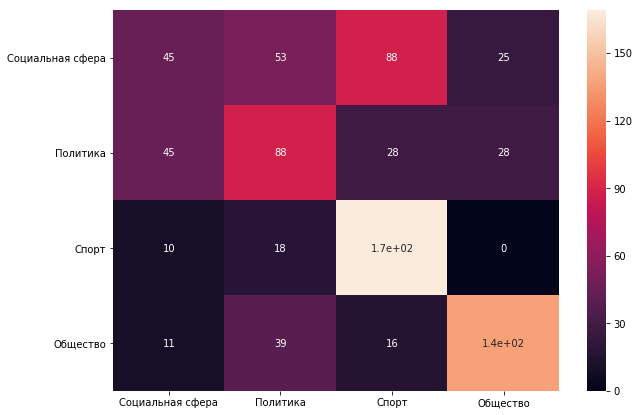

In [658]:
cm = confusion_matrix(y_test, predictions, labels)
plot_cm(cm)
print_metrics_from_cm(cm)

In [659]:
print(classification_report(y_test, predictions, labels))

                  precision    recall  f1-score   support

Социальная сфера       0.41      0.21      0.28       211
        Политика       0.44      0.47      0.45       189
           Спорт       0.56      0.86      0.68       197
        Общество       0.72      0.67      0.70       203

        accuracy                           0.55       800
       macro avg       0.53      0.55      0.53       800
    weighted avg       0.53      0.55      0.53       800



In [0]:
# или AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [661]:
pipeline = Pipeline(steps=[('vectorizer', CountVectorizer()), ('tf_idf', TfidfTransformer()), ('lsa', TruncatedSVD()), ('classifier', AdaBoostClassifier())], verbose=True)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

[Pipeline] ........ (step 1 of 4) Processing vectorizer, total=   0.7s
[Pipeline] ............ (step 2 of 4) Processing tf_idf, total=   0.1s
[Pipeline] ............... (step 3 of 4) Processing lsa, total=   0.2s
[Pipeline] ........ (step 4 of 4) Processing classifier, total=   0.3s


Mean Precision: 0.5800510420736522
Mean Recall 0.5641154747794381
Accuracy: 0.5625
F1 score: 0.5719722858096892


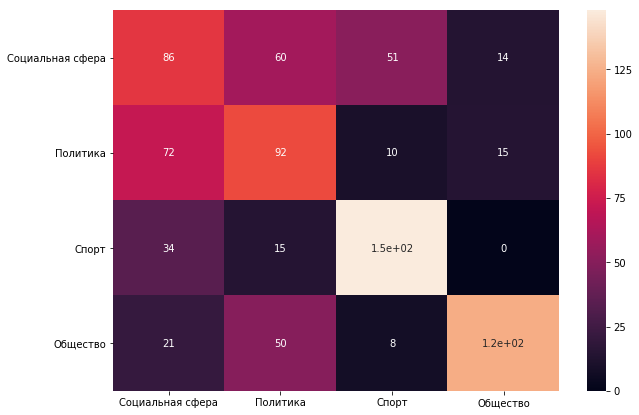

In [662]:
cm = confusion_matrix(y_test, predictions, labels)
plot_cm(cm)
print_metrics_from_cm(cm)

Качестве лучше, чем у SGDClassifier-а, но по-прежнему оставляет желать лучшего (впрочем, случайный лес и другие выше используемые алгоритмы в принципе обчно хуже, чем SGD классификатор на sparce матрицах). Т.е. результаты ухудшились после добавления нового шага. Нет смысла терять информацию, понижая размерность, если в данной задаче хватает памяти, чтобы хранить sparse матрицы.

## Влияние лемматизации на качество работы алгоритмов
Посмотрим, как влияет лемматизация на качество классификации, а также посмотрим, как изменится качество, если мы будем обучаться на n-граммах, где n > 1.

In [0]:
# берём в качестве обучающей и тестовой выборок лемматизированные тексты
X_train = X_train_full['lemmatized_text']
X_test = X_test_full['lemmatized_text']

In [664]:
pipeline = Pipeline([('vectorizer', CountVectorizer()), ('tf_idf', TfidfTransformer()), ('classifier', SGDClassifier())], verbose=True)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

[Pipeline] ........ (step 1 of 3) Processing vectorizer, total=   0.5s
[Pipeline] ............ (step 2 of 3) Processing tf_idf, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


Mean Precision: 0.7592933780177356
Mean Recall 0.7593979753044926
Accuracy: 0.7575
F1 score: 0.7593456730591338


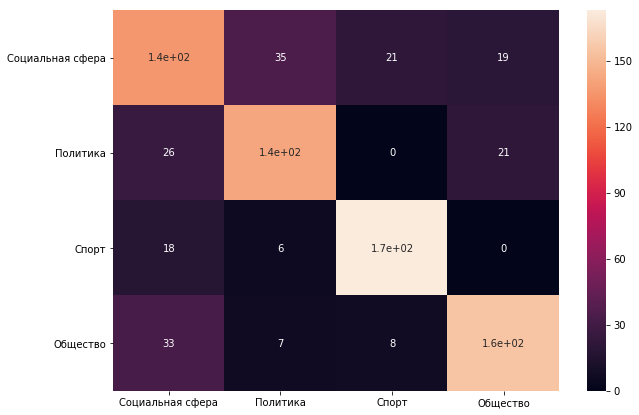

In [665]:
cm = confusion_matrix(y_test, predictions, labels)
plot_cm(cm)
print_metrics_from_cm(cm)

In [666]:
print(classification_report(y_test, predictions, labels))

                  precision    recall  f1-score   support

Социальная сфера       0.64      0.64      0.64       211
        Политика       0.75      0.75      0.75       189
           Спорт       0.86      0.88      0.87       197
        Общество       0.79      0.76      0.78       203

        accuracy                           0.76       800
       macro avg       0.76      0.76      0.76       800
    weighted avg       0.76      0.76      0.76       800



На лемматизированных текстах качество чуть просело (в среднем на 0.5%), хотя, возможно, это в пределах погрешности, т.е. на деле нет никакой разницы. Либо словоформы (, а не леммы) помогают в различении топиков. По цифрам в матрице ошибок всё не так однозначно, кое-где стало немного больше ошибок, кое-где наоборот немного меньше.

Попробуем использовать n-граммы с n<=5 и посмотрим на качество.

In [667]:
n = 5
pipeline = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1, n))), ('tf_idf', TfidfTransformer()), ('classifier', SGDClassifier())], verbose=True)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

[Pipeline] ........ (step 1 of 3) Processing vectorizer, total=  10.4s
[Pipeline] ............ (step 2 of 3) Processing tf_idf, total=   0.5s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   1.1s


Mean Precision: 0.7764929599636311
Mean Recall 0.7807028511817125
Accuracy: 0.77625
F1 score: 0.7785922148355335


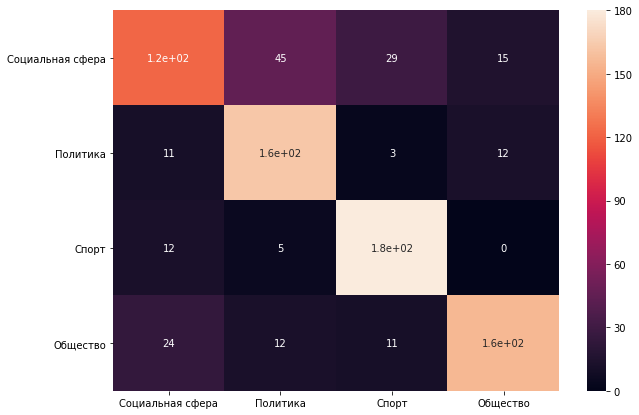

In [668]:
cm = confusion_matrix(y_test, predictions, labels)
plot_cm(cm)
print_metrics_from_cm(cm)

In [669]:
print(classification_report(y_test, predictions, labels))

                  precision    recall  f1-score   support

Социальная сфера       0.72      0.58      0.64       211
        Политика       0.72      0.86      0.79       189
           Спорт       0.81      0.91      0.86       197
        Общество       0.85      0.77      0.81       203

        accuracy                           0.78       800
       macro avg       0.78      0.78      0.77       800
    weighted avg       0.78      0.78      0.77       800



Качество естественным образом улучшилось, хоть и незначительно (в среднем на 1.5%)

## CBOW (Continuous bag of words)

В Pipeline-е с baseline-ом мы использовали обычное представление текста в виде мешка слов (BOW). Попробуем использовать другие модели представления текста: СBOW (непрерывноый мешок слов (набора эмбеддингов)).

Попробуем разные подходы к представлению документа:
* усредняем все эмбеддинги слов, входящих в этот текст (довольно неточное представление)
* усредняем все эмбеддинги слов, входящих в этот текст с $tf-idf$ весами (чуть точнее)
* используем Doc2Vec из библиотеку gensim

Качество оценим по тем же метрикам и аналогичным образом визуализируем.

Используем тексты без лемматизации, т.к. на них SGDClassifier показал себя лучше

In [0]:
# training word2vec model
from gensim.models import Word2Vec

In [0]:
size_of_embedding = 300
corpus = df['lemmatized_words']

In [740]:
# set parameters and seed
model = Word2Vec(corpus, size=size_of_embedding, window=7, min_count=0, iter=10, workers=4, seed=21)
model.wv.init_sims(replace=True) # save only normalized vectors
model.save("word2vec.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
word_vectors = model.wv

In [0]:
corpus_vectors = []
for num_text, text in enumerate(corpus):
    corpus_vectors.append([])
    for word in text:
        corpus_vectors[num_text].append(word_vectors[word])

In [0]:
# усредним эмбеддинги всех слов, входящих в этот текст

docs_vectors = np.zeros(shape=(len(corpus), size_of_embedding))
for num_text in range(len(corpus)):
    docs_vectors[num_text] = np.sum(corpus_vectors[num_text], axis=0) / len(corpus_vectors[num_text])

In [744]:
docs_vectors.shape

(4000, 300)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(docs_vectors, df['source'], test_size=0.2, random_state=21)

In [0]:
clf = SGDClassifier().fit(X_train, y_train)

In [0]:
predictions = clf.predict(X_test)

Mean Precision: 0.7306596007858468
Mean Recall 0.7277994337386611
Accuracy: 0.725
F1 score: 0.7292267127420912


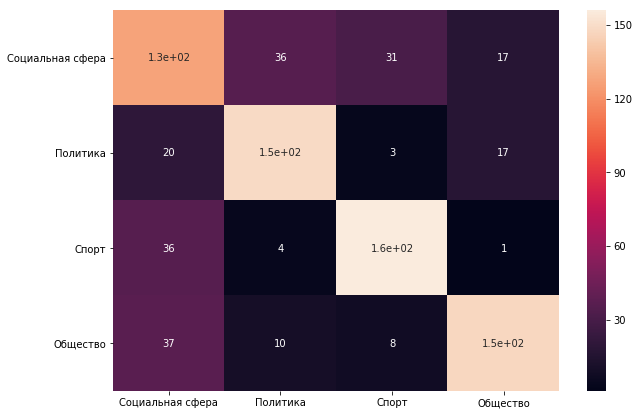

In [748]:
cm = confusion_matrix(y_test, predictions, labels)
plot_cm(cm)
print_metrics_from_cm(cm)

In [751]:
print(classification_report(y_test, predictions, labels))

                  precision    recall  f1-score   support

Социальная сфера       0.58      0.60      0.59       211
        Политика       0.75      0.79      0.77       189
           Спорт       0.79      0.79      0.79       197
        Общество       0.81      0.73      0.77       203

        accuracy                           0.73       800
       macro avg       0.73      0.73      0.73       800
    weighted avg       0.73      0.72      0.73       800



Качество хуже, чем у baseline в задании 3-м (на 5-10% от лучшего), поскольку среднее векторов документа (без весов, вернее, с одинаковыми весами == 1 / n, где n -- количество слов в документе) не является очень хорошим представлением документа. Ошибки по большей части те же.

In [0]:
# функция для подсчёта tf слов в документе
def tfs(words):
    tf = Counter(words)
    return [tf[word] / len(words) for word in words]

In [0]:
import math

# функция для подсчёта idf слова в документе
def idf(word, corpus):
    return math.log10(len(corpus) / (1 + len([1 for text in corpus if word in text]))) # added 1 so that we don't divide by zero

In [0]:
# усредним все эмбеддинги слов, входящих в этот текст, с 𝑡𝑓−𝑖𝑑𝑓 весами

# считает очень долго, поэтому отказываемся от "ручного" подсчёта tf-idf
# docs_vectors = np.zeros(shape=(len(corpus), size_of_embedding))
# for num_text, text in enumerate(corpus):
#     print(num_text)
#     term_frequencies = tfs(text)
#     for num_word in range(len(term_frequencies)):
#         tf_word = term_frequencies[num_word]
#         idf_word = idf(corpus[num_text][num_word], corpus)
#         docs_vectors[num_text] += tf_word * idf_word * corpus_vectors[num_text][num_word]

In [0]:
# вместо этого используем TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
# используем тот же токенизатор, что и при подсчёте уникальных слов выше
vectorizer = TfidfVectorizer(analyzer='word', tokenizer=word_tokenize)
tfidf_matrix = vectorizer.fit_transform(df['lemmatized_text'])

In [758]:
tfidf_matrix.shape

(4000, 37934)

In [0]:
feature_names = vectorizer.get_feature_names()

In [760]:
# все слова сохранились, т.е. ошибок быть не должно
'в' in feature_names

True

In [0]:
docs_vectors = np.zeros(shape=(len(corpus), size_of_embedding))
for num_text in range(len(corpus)):
    print(num_text)

    # get not-null word indices (columns)
    word_indices = tfidf_matrix[num_text, :].nonzero()[1]

    for word_index, word in enumerate(corpus[num_text]):
        try:
            index = feature_names.index(word)
        except ValueError: # some words like "речь."
            print(word)
            continue
        tf_idf = tfidf_matrix[num_text, index]
        # считаем tf-idf взвешенное векторов слов в документе
        docs_vectors[num_text] += corpus_vectors[num_text][word_index] * tf_idf

# print(len([tfidf_matrix[doc, word_index] for word_index in word_indices]))

In [769]:
docs_vectors.shape

(4000, 300)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(docs_vectors, df['source'], test_size=0.2, random_state=21)

In [0]:
clf = SGDClassifier().fit(X_train, y_train)

In [0]:
predictions = clf.predict(X_test)

Mean Precision: 0.655066674874345
Mean Recall 0.6594566726872858
Accuracy: 0.65625
F1 score: 0.6572543433363491


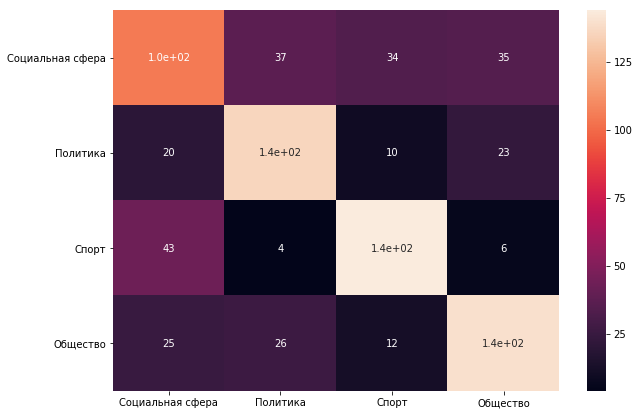

In [773]:
cm = confusion_matrix(y_test, predictions, labels)
plot_cm(cm)
print_metrics_from_cm(cm)

In [774]:
print(classification_report(y_test, predictions, labels))

                  precision    recall  f1-score   support

Социальная сфера       0.54      0.50      0.52       211
        Политика       0.67      0.72      0.69       189
           Спорт       0.72      0.73      0.73       197
        Общество       0.69      0.69      0.69       203

        accuracy                           0.66       800
       macro avg       0.66      0.66      0.66       800
    weighted avg       0.65      0.66      0.65       800



Качество оставляет желать лучшего, хотя обычно tf-idf взвешивание даёт более точное представление вектора документа, но всё же оно далеко от идеала. Здесь ошибка наблюдаются практически в каждой паре.

In [0]:
# использовать любую модель эмбеддинга документа.

# используем Doc2Vec из библиотеки gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument 

In [0]:
# приводим к нужному формату документы
docs = [TaggedDocument(words=df.loc[num_text, "lemmatized_words"], tags=[num_text]) for num_text in range(len(corpus))]

In [0]:
# dm == 0 => используем PV-DBOW (не сохраняем порядок)
model = Doc2Vec(vector_size=size_of_embedding, window=300, min_count=1, workers=4)

In [0]:
model.build_vocab(docs)

In [779]:
# обучаем только в течение 5 эпох, т.к. обучается долго
for epoch in range(5):
    print(epoch)
    model.train(docs,
                total_examples=model.corpus_count,
                epochs=model.iter)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  after removing the cwd from sys.path.


In [780]:
len(model.docvecs)

4000

In [0]:
X_train, X_test, y_train, y_test = train_test_split(model.docvecs, df['source'], test_size=0.2, random_state=21)

Mean Precision: 0.24530661083846056
Mean Recall 0.2471060530483498
Accuracy: 0.245
F1 score: 0.24620304405856364


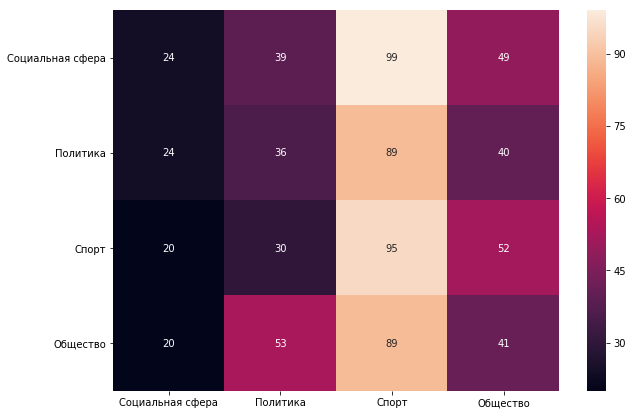

In [782]:
clf = SGDClassifier().fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels)
plot_cm(cm)
print_metrics_from_cm(cm)

In [783]:
print(classification_report(y_test, predictions, labels))

                  precision    recall  f1-score   support

Социальная сфера       0.27      0.11      0.16       211
        Политика       0.23      0.19      0.21       189
           Спорт       0.26      0.48      0.33       197
        Общество       0.23      0.20      0.21       203

        accuracy                           0.24       800
       macro avg       0.25      0.25      0.23       800
    weighted avg       0.25      0.24      0.23       800



Как видно, подход с эмбеддингами не смог предоставить хорошего качества. На большем количестве эпох качество было бы лучше, но векторы обучаются очень долго, поэтому для демонстрации мы ограничились 5 эпохами. На 5 эпохах ошибок очень много: качество гораздо хуже, чем классификация по правилам.

## fastText

Используем ```fastText``` в режиме классификации. Оценим результаты классификации по стандартным мерам качества и проведём анализ ошибок (с визуализацией confusion matrix).

In [869]:
!pip install fasttext
import fasttext

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized_text'], df['source'], test_size=0.2, random_state=21)

In [871]:
df.head()

,text,source,lowered_words,Parse,lemmatized_words,symbols_length,words_length,POS,lemmatized_text,lowered_words_two,lowered_texts_two
0,Депутатами Собрания представителей внесены изм...,Социальная сфера,"[депутатами, собрания, представителей, внесены...","[(депутатами, NOUN,anim,masc plur,ablt, депута...","[депутат, собрание, представитель, внести, изм...",694,74,"[NOUN, NOUN, NOUN, PRTS, NOUN, NOUN, ADJF, NOU...",депутат собрание представитель внести изменени...,"[депутатами, собрания, представителей, внесены...",депутатами собрания представителей внесены изм...
1,"Торжественное мероприятие, посвященное 70-лети...",Социальная сфера,"[торжественное, мероприятие, посвященное, 70-л...","[(торжественное, ADJF,Qual neut,sing,nomn, тор...","[торжественный, мероприятие, посвятить, 70-лет...",953,98,"[ADJF, NOUN, PRTF, NOUN, NOUN, ADJF, ADJF, NOU...",торжественный мероприятие посвятить 70-летие п...,"[торжественное, мероприятие, ,, посвященное, 7...","торжественное мероприятие , посвященное 70-лет..."
2,В 2015 году 23 семьи улучшили свои жилищные ус...,Социальная сфера,"[2015, году, 23, семьи, улучшили, свои, жилищн...","[(2015, NUMB,intg, 2015, 1.0, ((<NumberAnalyze...","[2015, год, 23, семья, улучшить, свой, жилищны...",470,53,"[None, NOUN, None, NOUN, VERB, ADJF, ADJF, NOU...",2015 год 23 семья улучшить свой жилищный услов...,"[в, 2015, году, 23, семьи, улучшили, свои, жил...",в 2015 году 23 семьи улучшили свои жилищные ус...
3,Этого человека знают все жители района старшег...,Социальная сфера,"[человека, знают, жители, района, старшего, по...","[(человека, NOUN,anim,masc sing,gent, человек,...","[человек, знать, житель, район, старший, покол...",1989,199,"[NOUN, VERB, NOUN, NOUN, NOUN, NOUN, None, NOU...",человек знать житель район старший поколение 4...,"[этого, человека, знают, все, жители, района, ...",этого человека знают все жители района старшег...
4,По сравнению с предыдущим годом в Мокшанском р...,Социальная сфера,"[сравнению, предыдущим, годом, мокшанском, рай...","[(сравнению, NOUN,inan,neut sing,datv, сравнен...","[сравнение, предыдущий, год, мокшанский, район...",621,64,"[NOUN, ADJF, NOUN, ADJF, NOUN, NOUN, ADJF, NOU...",сравнение предыдущий год мокшанский район коли...,"[по, сравнению, с, предыдущим, годом, в, мокша...",по сравнению с предыдущим годом в мокшанском р...


In [0]:
with open('train.txt', 'w', encoding='utf-8') as f:
    for text, target in zip(X_train, y_train):
        f.write("__label__" + target.split()[0] + ' ' + text + '\n')

In [0]:
with open('test.txt', 'w', encoding='utf-8') as f:
    for text, target in zip(X_test, y_test):
        f.write("__label__" + target.split()[0] + ' ' + text + '\n')

In [0]:
classifier = fasttext.supervised('train.txt', 'model', label_prefix='__label__')

In [0]:
result = classifier.test('test.txt')

In [876]:
print('P@1:', result.precision)
print('R@1:', result.recall)
print('Number of examples:', result.nexamples)

P@1: 0.64125
R@1: 0.64125
Number of examples: 800


In [0]:
predictions = [label[0] for label in classifier.predict(X_test)]

Mean Precision: 0.6816281010723398
Mean Recall 0.6531852357231491
Accuracy: 0.64125
F1 score: 0.6671036310490114


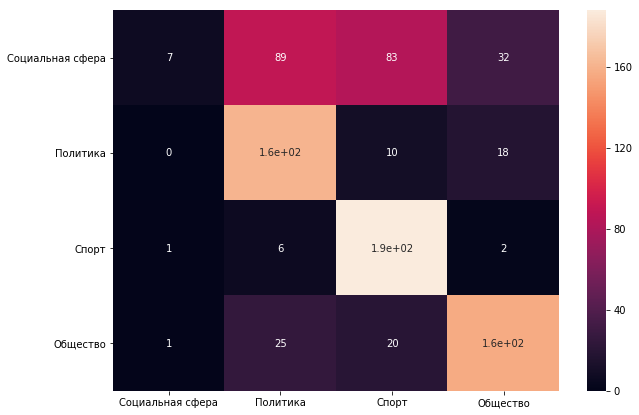

In [886]:
tmp_labels = labels[:]
tmp_labels[0] = 'Социальная'
tmp_y_test = y_test.replace(['Социальная сфера'], ['Социальная'])
cm = confusion_matrix(tmp_y_test, predictions, tmp_labels)
plot_cm(cm)
print_metrics_from_cm(cm)

In [887]:
print(classification_report(list(tmp_y_test), predictions, tmp_labels))

              precision    recall  f1-score   support

  Социальная       0.78      0.03      0.06       211
    Политика       0.57      0.85      0.69       189
       Спорт       0.62      0.95      0.76       197
    Общество       0.75      0.77      0.76       203

    accuracy                           0.64       800
   macro avg       0.68      0.65      0.57       800
weighted avg       0.68      0.64      0.56       800



Качество немного меньше, чем ранее (в среднем на 0.1 по метрикам).

Здесь частотнее ошибка с атрибуцией 'Социальной сферы' к текстам с лейблом 'Политика'. Самыми разграниченными классами также (как и во многих случаях выше) является пара 'Спорт' и 'Политика'.

## CNN

Реализуем модель Kim et al (2014) для решения задачи классификации с помощью CNN. Аналогичным образом оценим результаты.

In [888]:
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.models import Model, Sequential
from keras.utils import np_utils

import numpy as np

np.random.seed(21) # for reproducibility

Using TensorFlow backend.


In [0]:
# set hyperparameters
TEXT_LENGTH = 1800
VOCABULARY_SIZE = 250000
EMBEDDING_DIM = 300
batch_size = 32
nb_epoch = 50

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized_text'], df['source'], test_size=0.2, random_state=21)

In [0]:
# токенизируем и фитим на обучающих текстах
tokenizer = Tokenizer(num_words=TEXT_LENGTH)
tokenizer.fit_on_texts(X_train.values)

In [0]:
# sequence --> matrix
sequences = tokenizer.texts_to_sequences(X_train.values)
X_train = tokenizer.sequences_to_matrix(sequences, mode='count')
sequences = tokenizer.texts_to_sequences(X_test.values)
X_test = tokenizer.sequences_to_matrix(sequences, mode='count')

In [893]:
print('First seq:', sequences[0])
print('First doc:', X_test[0])

First seq: [309, 319, 209, 387, 326, 8, 338, 79, 1719, 34, 152, 91, 846, 106, 43, 98, 1482, 772, 18, 633, 343, 1681, 140, 1308, 22, 327, 171, 62, 151, 22, 106, 98, 1791, 135, 18, 22, 19, 1525, 19, 1019, 68, 330, 171, 56, 11, 68, 315, 18, 961, 156, 522, 1102, 87, 3, 307, 338, 853, 569, 175, 27, 151, 105, 201, 1766, 318, 1719, 1011, 34, 43, 16, 110, 6, 2, 13, 1525, 394, 22, 259, 771, 37, 566]
First doc: [0. 0. 1. ... 0. 0. 0.]


In [894]:
# one-hot кодируем целевую переменную, создавая LabelEncoder
le = LabelEncoder()
classes = y_train.unique()
le.fit(classes)
y_formatted_train = np_utils.to_categorical(le.transform(y_train), len(classes))
y_formatted_test = np_utils.to_categorical(le.transform(y_test), len(classes))
y_formatted_true = le.transform(y_test)
print(y_formatted_train[0]) # example

[1. 0. 0. 0.]


In [895]:
# Пробуем архитектуру
model = Sequential()
model.add(Embedding(VOCABULARY_SIZE,
                    EMBEDDING_DIM,
                    input_length=TEXT_LENGTH,
                    trainable=True))
model.add(Conv1D(128, len(classes), activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(len(classes), activation='softmax'))
# специфицирует метрику, алгоритм обновления параметров и функцию потерь
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

W0614 01:45:55.489413 140416733079424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 01:45:55.561288 140416733079424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 01:45:55.567755 140416733079424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 01:45:55.614580 140416733079424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0614 01:45:55.619884 140416733079424 deprecation_wrapp

In [896]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1800, 300)         75000000  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1797, 128)         153728    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 898, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 898, 128)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 114944)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 459780    
Total params: 75,613,508
Trainable params: 75,613,508
Non-trainable params: 0
________________________________________________________________

In [897]:
model.fit(X_train, y_formatted_train, epochs=nb_epoch, batch_size=batch_size, validation_split=0.1)

W0614 01:46:10.020435 140416733079424 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2880 samples, validate on 320 samples
Epoch 1/50
2880/2880 [==============================] - 15s 5ms/step - loss: 0.9054 - acc: 0.6622 - val_loss: 0.6508 - val_acc: 0.7656
Epoch 2/50
2880/2880 [==============================] - 7s 2ms/step - loss: 0.4809 - acc: 0.8306 - val_loss: 0.7153 - val_acc: 0.7562
Epoch 3/50
2880/2880 [==============================] - 7s 2ms/step - loss: 0.2609 - acc: 0.9097 - val_loss: 0.9631 - val_acc: 0.7594
Epoch 4/50
2880/2880 [==============================] - 7s 2ms/step - loss: 0.1455 - acc: 0.9510 - val_loss: 1.2210 - val_acc: 0.7312
Epoch 5/50
2880/2880 [==============================] - 7s 2ms/step - loss: 0.0795 - acc: 0.9823 - val_loss: 1.5353 - val_acc: 0.7344
Epoch 6/50
2880/2880 [==============================] - 7s 2ms/step - loss: 0.0599 - acc: 0.9882 - val_loss: 1.7156 - val_acc: 0.7281
Epoch 7/50
2880/2880 [==============================] - 7s 2ms/step - loss: 0.0605 - acc: 0.9899 - val_loss: 1.7811 - val_acc: 0.7219
Epoch 8/50
288

In [0]:
y_pred = model.predict_classes(X_test)
predictions = le.inverse_transform(y_pred)

Mean Precision: 0.7206244284516901
Mean Recall 0.7203840310708491
Accuracy: 0.71875
F1 score: 0.7205042097090276


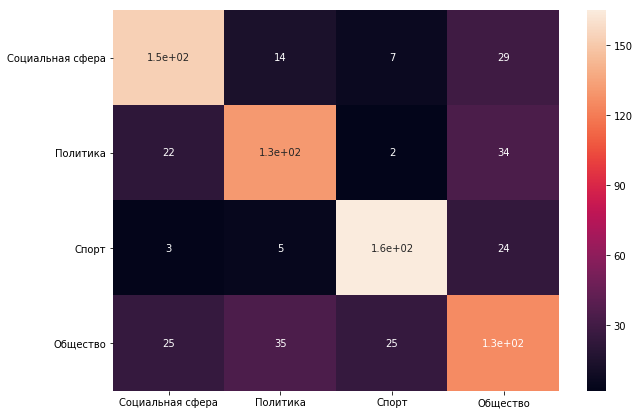

In [899]:
cm = confusion_matrix(y_test, predictions, classes)
plot_cm(cm)
print_metrics_from_cm(cm)

In [900]:
print(classification_report(y_test, predictions, classes))

                  precision    recall  f1-score   support

        Общество       0.75      0.75      0.75       203
        Политика       0.71      0.69      0.70       189
           Спорт       0.83      0.84      0.83       197
Социальная сфера       0.59      0.60      0.59       211

        accuracy                           0.72       800
       macro avg       0.72      0.72      0.72       800
    weighted avg       0.72      0.72      0.72       800



Судя по метрикам на валидирующей выборке, качество не увеличивается (нестабильно, скачет туда-сюда) на протяжении многих эпох, поэтому достаточно было меньшего количества эпох. Также, по-видимому, архитектура подобрана не самым удачным образом, поэтому попробуем её поменять, обучить на 10 эпохах и посмотреть на качество.

In [0]:
nb_epoch = 10

In [0]:
# удалил dropout, поскольку, на мой взгляд, нет смысла выбрасывать ценную информацию в данной задаче
model = Sequential()
model.add(Embedding(VOCABULARY_SIZE,
                    EMBEDDING_DIM,
                    input_length=TEXT_LENGTH,
                    trainable=True))
model.add(Conv1D(512, len(classes), activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(256, len(classes), activation='relu'))
model.add(Flatten())
model.add(Dense(len(classes), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [903]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1800, 300)         75000000  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1797, 512)         614912    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 898, 512)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 895, 256)          524544    
_________________________________________________________________
flatten_2 (Flatten)          (None, 229120)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 916484    
Total params: 77,055,940
Trainable params: 77,055,940
Non-trainable params: 0
________________________________________________________________

In [904]:
model.fit(X_train, y_formatted_train, epochs=nb_epoch, batch_size=batch_size, validation_split=0.1)

Train on 2880 samples, validate on 320 samples
Epoch 1/10
2880/2880 [==============================] - 16s 6ms/step - loss: 1.0032 - acc: 0.5872 - val_loss: 0.6802 - val_acc: 0.7625
Epoch 2/10
2880/2880 [==============================] - 14s 5ms/step - loss: 0.5383 - acc: 0.8090 - val_loss: 0.6883 - val_acc: 0.7531
Epoch 3/10
2880/2880 [==============================] - 14s 5ms/step - loss: 0.3048 - acc: 0.8986 - val_loss: 0.8134 - val_acc: 0.7312
Epoch 4/10
2880/2880 [==============================] - 14s 5ms/step - loss: 0.1421 - acc: 0.9559 - val_loss: 1.2884 - val_acc: 0.7219
Epoch 5/10
2880/2880 [==============================] - 14s 5ms/step - loss: 0.0754 - acc: 0.9837 - val_loss: 1.8197 - val_acc: 0.7375
Epoch 6/10
2880/2880 [==============================] - 14s 5ms/step - loss: 0.0527 - acc: 0.9906 - val_loss: 1.4647 - val_acc: 0.7406
Epoch 7/10
2880/2880 [==============================] - 14s 5ms/step - loss: 0.0412 - acc: 0.9951 - val_loss: 2.0253 - val_acc: 0.7312
Epoch 8/

In [0]:
y_pred = model.predict_classes(X_test)
predictions = le.inverse_transform(y_pred)

Mean Precision: 0.734291206465203
Mean Recall 0.7312759092930367
Accuracy: 0.73
F1 score: 0.7327804560023996


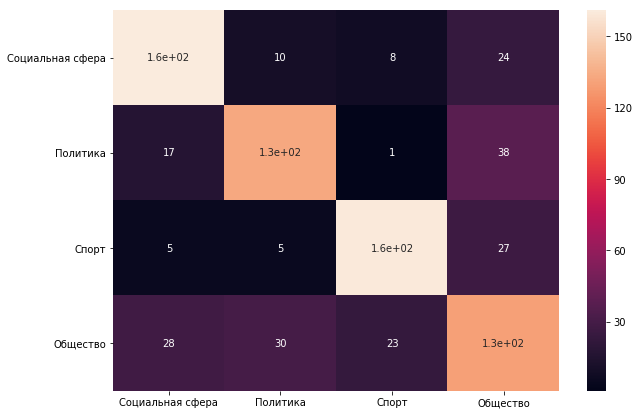

In [906]:
cm = confusion_matrix(y_test, predictions, classes)
plot_cm(cm)
print_metrics_from_cm(cm)

Качество чуть получше, чем на предыдущей архитектуре, но всё равно далеко от baseline-а. Возможно, на лучше подобранной архитектуре и на большем количестве эпох качество было бы получше.

Попобуем ещё следующую архитектуру:

In [0]:
model = Sequential()
model.add(Embedding(VOCABULARY_SIZE,
                    EMBEDDING_DIM,
                    input_length=TEXT_LENGTH,
                    trainable=True))

model.add(Conv1D(512, len(classes), activation='relu'))
model.add(Conv1D(256, len(classes), activation='relu'))
model.add(MaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(len(classes), activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [908]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1800, 300)         75000000  
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1797, 512)         614912    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1794, 256)         524544    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 897, 256)          0         
_________________________________________________________________
dense_3 (Dense)              (None, 897, 128)          32896     
_________________________________________________________________
dense_4 (Dense)              (None, 897, 64)           8256      
_________________________________________________________________
flatten_3 (Flatten)          (None, 57408)             0         
__________

In [909]:
model.fit(X_train, y_formatted_train, epochs=nb_epoch, batch_size=batch_size, validation_split=0.1)

Train on 2880 samples, validate on 320 samples
Epoch 1/10
2880/2880 [==============================] - 18s 6ms/step - loss: 1.1227 - acc: 0.4899 - val_loss: 0.7494 - val_acc: 0.7344
Epoch 2/10
2880/2880 [==============================] - 16s 5ms/step - loss: 0.5822 - acc: 0.7993 - val_loss: 0.6883 - val_acc: 0.7781
Epoch 3/10
2880/2880 [==============================] - 16s 6ms/step - loss: 0.3295 - acc: 0.8934 - val_loss: 0.7682 - val_acc: 0.7500
Epoch 4/10
2880/2880 [==============================] - 16s 5ms/step - loss: 0.1398 - acc: 0.9542 - val_loss: 1.4773 - val_acc: 0.7219
Epoch 5/10
2880/2880 [==============================] - 16s 5ms/step - loss: 0.0910 - acc: 0.9767 - val_loss: 1.6440 - val_acc: 0.7406
Epoch 6/10
2880/2880 [==============================] - 16s 5ms/step - loss: 0.0612 - acc: 0.9878 - val_loss: 1.4847 - val_acc: 0.7406
Epoch 7/10
2880/2880 [==============================] - 15s 5ms/step - loss: 0.0641 - acc: 0.9896 - val_loss: 1.7203 - val_acc: 0.7375
Epoch 8/

In [0]:
y_pred = model.predict_classes(X_test)
predictions = le.inverse_transform(y_pred)

Mean Precision: 0.7291582559965918
Mean Recall 0.7280822130476988
Accuracy: 0.72625
F1 score: 0.7286198372409647


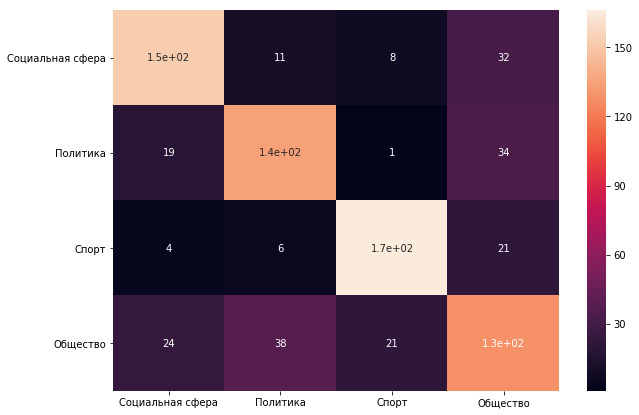

In [911]:
cm = confusion_matrix(y_test, predictions, classes)
plot_cm(cm)
print_metrics_from_cm(cm)

Здесь качество упало. Самой частотной парой является, как ни странно, пара "mospolice" - "mil", хотя на методах без использования нейросетей именно в ней реже всего ошибались модели, т.е. это в очередной раз свидетельствует о сильно отличающихся подходах к решению задачи классификации.

В случае с CNN, много ошибок так же в парах "Социальная сфера" - "Политика", "Спорт" - "Общество", "Общество" - "Социальная сфера" и ""Политика - "Общество".

## RNN

Используем ```RNN``` (BLSTM + макс. пулинг поверх) для решения задачи текстовой классификации. Аналогичным образом оцениваем результаты.

In [0]:
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D
from keras.preprocessing import sequence

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized_text'], df['source'], test_size=0.2, random_state=21)

In [0]:
tokenizer = Tokenizer(num_words=TEXT_LENGTH)
tokenizer.fit_on_texts(X_train.values)

In [0]:
# падим последовательности для одинаковой длины (не больше TEXT_LENGTH=1800) всех входных последовательностей
sequences = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(sequences, maxlen=TEXT_LENGTH, padding='post')
sequences = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(sequences, maxlen=TEXT_LENGTH, padding='post')

In [917]:
le = LabelEncoder()
classes = y_train.unique()
le.fit(classes)
y_formatted_train = np_utils.to_categorical(le.transform(y_train), len(classes))
y_formatted_test = np_utils.to_categorical(le.transform(y_test), len(classes))
y_formatted_true = le.transform(y_test)
print(y_formatted_train[0])

[1. 0. 0. 0.]


In [0]:
# архитектура с BiLSTM и maxpooling-ом после
model = Sequential()
model.add(Embedding(VOCABULARY_SIZE,
                    EMBEDDING_DIM,
                    input_length=TEXT_LENGTH,
                    trainable=True))
# конктенируем вывод из LStM по левому и правому контекстам
model.add(Bidirectional(LSTM(10, return_sequences=True), merge_mode='concat', weights=None))
model.add(GlobalMaxPooling1D())
model.add(Dense(len(classes), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [919]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1800, 300)         75000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1800, 20)          24880     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 84        
Total params: 75,024,964
Trainable params: 75,024,964
Non-trainable params: 0
_________________________________________________________________


In [920]:
model.fit(X_train, y_formatted_train, validation_data=(X_test, y_formatted_test), epochs=1, batch_size=batch_size)

Train on 3200 samples, validate on 800 samples
Epoch 1/1
3200/3200 [==============================] - 585s 183ms/step - loss: 1.1434 - acc: 0.6069 - val_loss: 0.8258 - val_acc: 0.7312


In [0]:
y_pred = model.predict_classes(X_test)
predictions = le.inverse_transform(y_pred)

Mean Precision: 0.74658200668039
Mean Recall 0.7378703816836935
Accuracy: 0.73125
F1 score: 0.7422006317555611


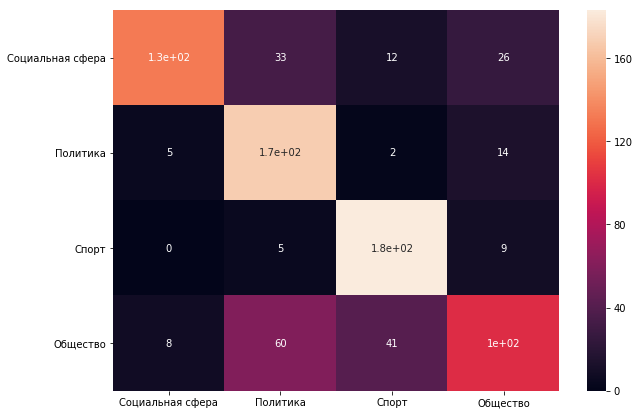

In [922]:
cm = confusion_matrix(y_test, predictions, classes)
plot_cm(cm)
print_metrics_from_cm(cm)

Примерно на 0.05 хуже, чем у SGDClassifier-а, но мы обучали только на одной эпохе (т.к. обучение очень долгое), поэтому результат скорее всего мог быть и лучше при большем количестве эпох.

Ошибки те же, что и в CNN, но с немного другими пропорциями. Меньше всего ошибок в паре "Политика" -- "спорт"

## ULMFit

Используем ```ULMFit``` для решения задачи классификации. Аналогичным образом оцениваем результаты.

In [923]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
     |████████████████████████████████| 576.2MB 23kB/s 


In [0]:
# подключаем необходимые библиотеки с реализованной ULMFiT (SOTA-моделью для текстовой классификации).
import fastai
from fastai import *
from fastai.text import *

In [0]:
# приведём к датафрейму с нужными названиями колонок (label и text)
tmp_df = pd.DataFrame({'label':df.source, 'text':df.lemmatized_words})

In [0]:
# train_test_split на обучающий датафрейм и датафрейм для валидации
df_trn, df_val = train_test_split(tmp_df, stratify=tmp_df['label'], test_size=0.3, random_state=21)

In [927]:
df_trn.shape, df_val.shape

((2800, 2), (1200, 2))

In [0]:
# получаем из датасетов языковая модель из датафрейма
data_lm = TextLMDataBunch.from_df(train_df=df_trn, valid_df=df_val, path="")

In [0]:
# получаем из датасетов модель для классификации
data_clas = TextClasDataBunch.from_df(path="", train_df=df_trn, valid_df=df_val, vocab=data_lm.train_ds.vocab, bs=24)

In [0]:
# LanguageLearner
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.5)

In [931]:
# своего рода регуляризация для улучшений качества (скорость обучения = 0.01)
learn.fit_one_cycle(cyc_len=1, max_lr=0.01)

epoch,train_loss,valid_loss,accuracy,time
0,1.957753,1.820137,0.765496,02:12


In [0]:
# сохраняем encoder
learn.save_encoder('encoder')

In [0]:
# используем data_clas, чтобы построить классификатор с помощью сохранённого encoder-а
learn = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.5)

In [0]:
# загружаем encoder
learn.load_encoder('encoder')

In [935]:
# как ни странно, значение функции потерь на валидирующей выборке значительно меньше, чем на обучающей выборке
learn.fit_one_cycle(cyc_len=1, max_lr=0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.898299,0.827028,0.651667,02:00


In [0]:
# предсказания и целевая переменная
preds, targets = learn.get_preds()

In [0]:
predictions = np.argmax(preds, axis=1)

Mean Precision: 0.6610690214510491
Mean Recall 0.6516666666666666
Accuracy: 0.6516666666666666
F1 score: 0.6563341722861272


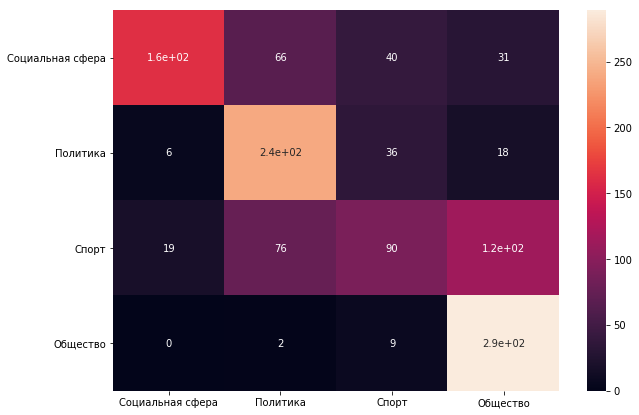

In [938]:
cm = confusion_matrix(targets, predictions)
plot_cm(cm)
print_metrics_from_cm(cm)

Качество довольно плохое. Очень часто модель ошибочно предсказывает тему "Спорт" для темы "Общество", и в целом "Спорт" гораздо чаще, чем ранее, путается с другими топиками. Также сохраняются многочисленные ошибки в паре "Социальная сфера" -- "Политика".

## Конец

Сравним по метрике accuracy (приводится наилучшее значение) все использованные в данной тетрадке модели:

1) rules-based approach: 0.4375

2) CountVectorizer + TfidfTransformer + MultinomialNB: 0.74

3) CountVectorizer + TfidfTransformer + SGDClassifier: 0.7725

4) CountVectorizer + TfidfTransformer + LSA + SGDClassifier: 0.5

5) CountVectorizer + TfidfTransformer + LSA + RandomForestClassifier: 0.55375

6) CountVectorizer + TfidfTransformer + LSA + LogisticRegression: 0.54875

7) CountVectorizer + TfidfTransformer + LSA + AdaBoostClassifier: 0.5625

8) CountVectorizer + TfidfTransformer + SGDClassifier (with lemmatization): 0.7575

9) CountVectorizer + TfidfTransformer + SGDClassifier (with lemmatization and n-grams (n <= 5)): 0.77625

10) Doc Embeddings (mean of all vectors): 0.725

11) Doc Embeddings (tf-idf weighting): 0.65625

12) doc2vec (gensim, 5 epochs): 0.245

13) fasttext: 0.64125

14) CNN: 0.73

15) BiLSTM (1 epoch): 0.73125

16) ULMFit: 0.6516666666666666

По метрике accuracy побеждает модель "CountVectorizer + TfidfTransformer + SGDClassifier (with lemmatization and n-grams (n <= 5))" с результатом 0.77625.

Хорошо себя показывают также CountVectorizer + TfidfTransformer + MultinomialNB: 0.74, BiLSTM (0.73125), CNN (0.73), Doc Embeddings (mean of all vectors) (0.725), 

Чуть хуже, но также в пределах "нормы": Doc Embeddings (tf-idf weighting) (0.65625), fasttext (0.64125), ULMFit (0.6516666666666666), ...

Все остальные варианты дают не очень хорошее качество либо по причине недообучения, либо по причине простоты самой модели (rule-based approach, например).